#**Traffic Sign Recognition**

#Install Dependencies

In [ ]:
pip install numpy pandas matplotlib opencv-python tensorflow keras scikit-learn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Download Dataset with kagglehub

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


#Import Libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import kagglehub


#Load and Preprocess the Dataset

In [3]:
data_dir = "/kaggle/input/gtsrb-german-traffic-sign/Train"
img_size = 32

images = []
labels = []

# Iterate through each folder
for label in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, label)
    if not os.path.isdir(folder_path): continue

    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(int(label))
        except:
            print("Error loading image:", img_path)

X = np.array(images)
y = np.array(labels)

# Normalize images
X = X / 255.0

# One-hot encode labels
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)


#Train/Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#Data Augmentation

In [5]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)


#Build a Custom CNN Model

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

#Train the Model

In [8]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=15,
    validation_data=(X_test, y_test)
)


Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.8293 - loss: 0.5240 - val_accuracy: 0.9816 - val_loss: 0.0926
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.8404 - loss: 0.4859 - val_accuracy: 0.9806 - val_loss: 0.1001
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8412 - loss: 0.4868 - val_accuracy: 0.9834 - val_loss: 0.0813
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.8459 - loss: 0.4618 - val_accuracy: 0.9864 - val_loss: 0.0815
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8551 - loss: 0.4377 - val_accuracy: 0.9864 - val_loss: 0.0677
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.8616 - loss: 0.4286 - val_accuracy: 0.9881 - val_loss: 0.0589
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.8626 - loss: 0.4245 - val_accuracy: 0.9871 - val_loss: 0.0676
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8720 - loss: 0.3910 - 

#Evaluate Performance

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9925 - loss: 0.0384
Test Accuracy: 99.26%
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.99      1.00      0.99       444
           2       0.98      0.98      0.98       450
           3       1.00      0.95      0.98       282
           4       0.99      1.00      0.99       396
           5       0.95      0.97      0.96       372
           6       1.00      1.00      1.00        84
           7       0.99      0.99      0.99       288
           8       0.99      0.98      0.98       282
           9       1.00      1.00      1.00       294
          10       1.00      1.00      1.00       402
          11       0.99      1.00      1.00       264
          12       1.00      1.00      1.00       420
          13       1.00      1.00      1.00       432
          14       1.00      1.00      1.00       1

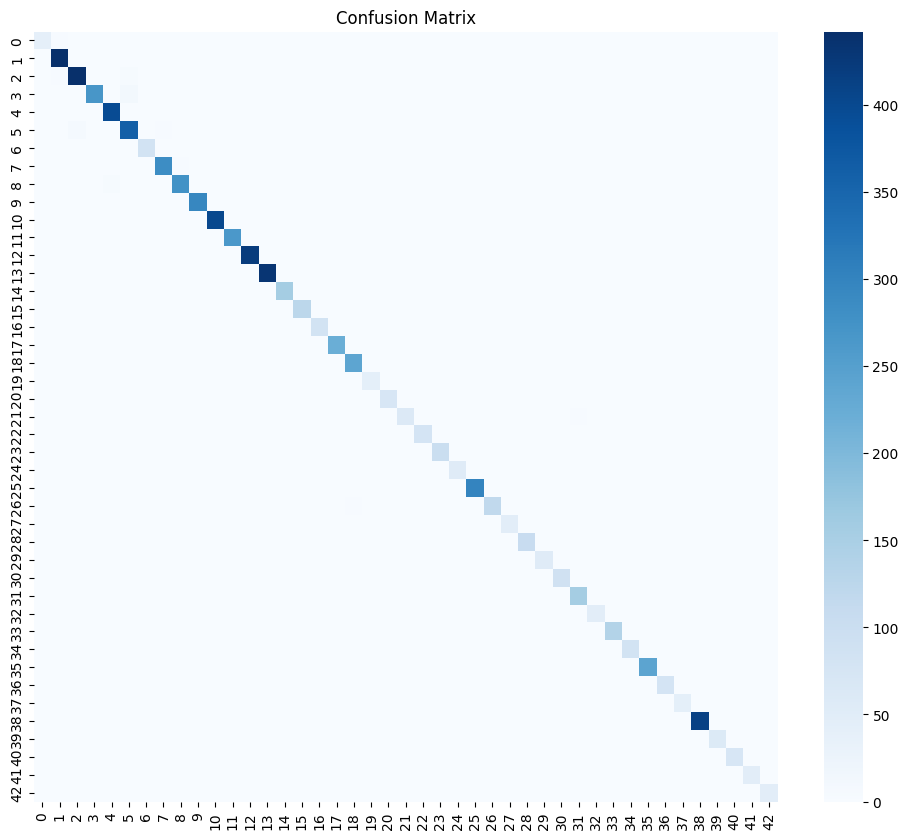

In [9]:
# Accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [14]:
import os

for root, dirs, files in os.walk("/kaggle/input/gtsrb-german-traffic-sign"):
    print(f"Directory: {root}")
    for file in files:
        print("  ", file)


Streaming output truncated to the last 5000 lines.
   00009_00018_00006.png
   00009_00022_00010.png
   00009_00017_00016.png
   00009_00036_00028.png
   00009_00013_00016.png
   00009_00018_00018.png
   00009_00006_00004.png
   00009_00024_00000.png
   00009_00047_00007.png
   00009_00026_00025.png
   00009_00042_00006.png
   00009_00021_00011.png
   00009_00017_00008.png
   00009_00024_00003.png
   00009_00006_00028.png
   00009_00034_00025.png
   00009_00000_00010.png
   00009_00040_00002.png
   00009_00007_00025.png
   00009_00030_00001.png
   00009_00022_00027.png
   00009_00019_00015.png
   00009_00013_00017.png
   00009_00030_00026.png
   00009_00027_00025.png
   00009_00016_00026.png
   00009_00024_00007.png
   00009_00012_00005.png
   00009_00003_00027.png
   00009_00031_00004.png
   00009_00005_00022.png
   00009_00008_00025.png
   00009_00013_00009.png
   00009_00020_00028.png
   00009_00024_00005.png
   00009_00004_00014.png
   00009_00047_00009.png
   00009_00019_00024.png

#Load Test Data

In [20]:
test_dir = "/kaggle/input/gtsrb-german-traffic-sign"
test_csv_path = "/kaggle/input/gtsrb-german-traffic-sign/Test.csv"

import pandas as pd

test_data = pd.read_csv(test_csv_path)
test_images = []
test_labels = []

for _, row in test_data.iterrows():
    img_path = os.path.join(test_dir, row["Path"])  # Corrected line

    if not os.path.exists(img_path):
        print("Missing image:", img_path)
        continue

    img = cv2.imread(img_path)
    if img is None:
        print("Unreadable image:", img_path)
        continue

    img = cv2.resize(img, (img_size, img_size))
    test_images.append(img)
    test_labels.append(row["ClassId"])

X_final_test = np.array(test_images) / 255.0
y_final_test = to_categorical(test_labels, num_classes=num_classes)


#Evaluate Trained Model on GTSRB Test Set

In [21]:
final_loss, final_accuracy = model.evaluate(X_final_test, y_final_test)
print(f"Final Test Accuracy on GTSRB Official Test Set: {final_accuracy * 100:.2f}%")


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9526 - loss: 0.1835
Final Test Accuracy on GTSRB Official Test Set: 95.08%


#Confusion Matrix & Classification Report

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.95      0.99      0.97       720
           2       0.93      0.98      0.95       750
           3       0.99      0.87      0.92       450
           4       0.99      0.96      0.97       660
           5       0.87      0.90      0.88       630
           6       0.99      0.95      0.97       150
           7       0.98      0.93      0.95       450
           8       0.92      0.94      0.93       450
           9       0.96      1.00      0.98       480
          10       0.99      0.99      0.99       660
          11       0.92      0.96      0.94       420
          12       0.99      0.92      0.95       690
          13       0.97      1.00      0.98       720
          14       1.00      1.00      1.00       270
          15       0.90      1.00      0.94       210
          16       1.00      1.00      1

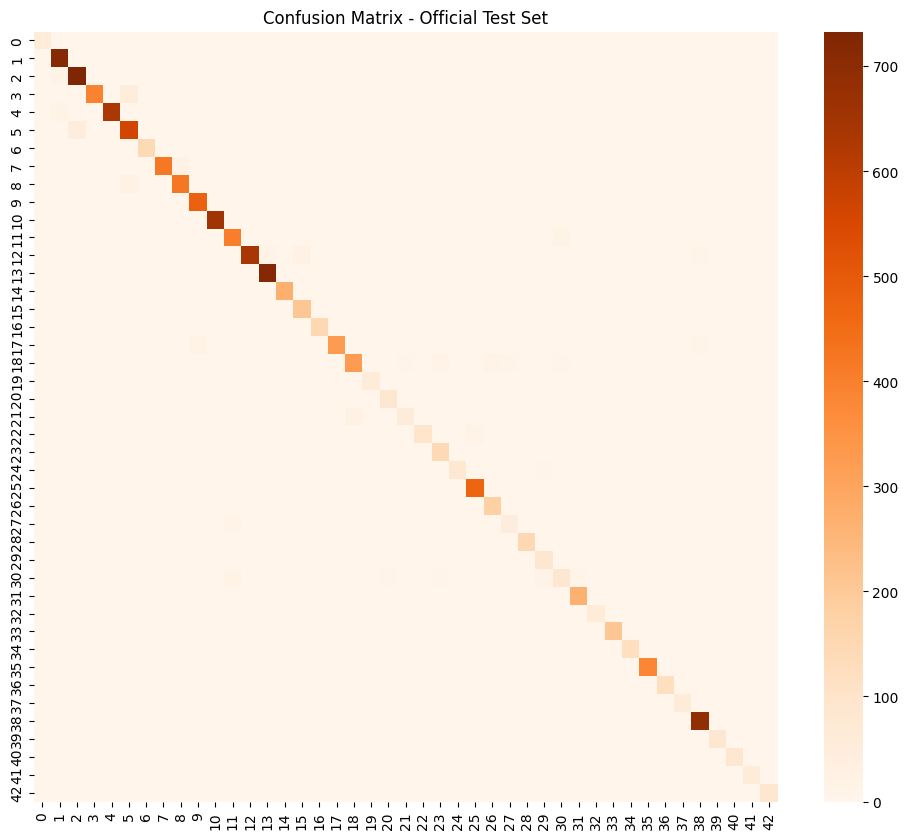

In [22]:
final_preds = model.predict(X_final_test)
y_pred_final = np.argmax(final_preds, axis=1)
y_true_final = np.array(test_labels)

print(classification_report(y_true_final, y_pred_final))

cm = confusion_matrix(y_true_final, y_pred_final)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap="Oranges", annot=False)
plt.title("Confusion Matrix - Official Test Set")
plt.show()
